# This is Week 4 Assignment of Capstone Project - The Battle of Neighbourhoods

### This notebook is used to explore the venues in Dubai and the Restaurants suitable for all people.

## Table of contents
* [Introduction: The Problem](#Introduction:-the-Problem-)
* [Data Collection from API](#Data-Collection-from-API)
* [Data Cleaning](#Data-Cleaning)
* [Methodology](#Methodology)
* [Analysis](#Analysis)
* [Results and Discussion](#Result-and-Discussion)
* [Conclusion](#Conclusion)

## Introduction: The Problem <a name="introduction"></a>

The City of Dubai is known for attracting tourists. Huge number of tourists drop by from different countries.
There are various kinds of **restaurants**,**hotels** for the tourists. When the sun ticks 12'o clock, in the afternoon we all begin to feel the pinch in the stomach. And visitors start serching for restaurants according to their budjet. So I have used **Foursquare API** to get the details of a venue called Karama in Dubai which hosts a number of popular restaurants for all category people.


## Data Collection from API

#### Two APIs
I have used **Foursquare API** to get the location details of the restaurants 
**Zomato API** to get information about various venues including the complete 
address, user ratings, price for two people, price range and a lot more. The reason for using Zomato was due to the Premier limitations in Foursquare where I couldn't call for rating.


### Import all the Libraries

In [8]:
import pandas as pd
import numpy as np
import random # library for random number generation
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import folium
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
import urllib.request
import csv
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import requests


### Get the Co-ordinates of Al Karama, Dubai

In [9]:
address = 'Karama, United Arab Emirates'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
dxb_latitude = location.latitude
dxb_longitude = location.longitude
print(dxb_latitude, dxb_longitude)

25.2482298 55.3051575


In [11]:
print('The Co-ordinates of Karama,dubai are {},{}.'.format(dxb_latitude, dxb_longitude))

The Co-ordinates of Karama,dubai are 25.2482298,55.3051575.


### Let use Folium map to zoom in Dubai

Let's use the folium library to create a complete map zoomed on Dubai. We'll also plot a marker on the coordinates we just identified above. This would give us a relatively good look at the center point we will be considering.

In [12]:
dxb_map = folium.Map(location = [dxb_latitude,dxb_longitude],zoom_start = 13)
folium.Marker([dxb_latitude, dxb_longitude]).add_to(dxb_map)
dxb_map

## Foursquare Credentials

We begin by fetching a total of all venues in **Karama,Dubai upto a range of 2 Kilometers** using the Foursquare API. The **Foursquare API** has the explore API which allows us to find venue recommendations within a given radius from the given coordinates. We will use this API to find all the venues we need.

In [13]:
CLIENT_ID = '2PI5YH3PDZJUD3KYVHYUNHJY0WSF0II30H2N2PSU12STNXNL' # your Foursquare ID
CLIENT_SECRET = 'ZV3KIHFTGQRQ2O31150KRVDTE4ZPRACK5PA4VCFWJ2WIR4ES'
VERSION = '20191116'
RADIUS = 2000 #2 KM
LIMIT = 50

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2PI5YH3PDZJUD3KYVHYUNHJY0WSF0II30H2N2PSU12STNXNL
CLIENT_SECRET:ZV3KIHFTGQRQ2O31150KRVDTE4ZPRACK5PA4VCFWJ2WIR4ES


## Define the URL to explore

First lets **explore** the places around Karama. Then we will filter the restaurants among all the venues.

In [14]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dxb_latitude, dxb_longitude, 
                                                                                                                           VERSION,RADIUS,LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=2PI5YH3PDZJUD3KYVHYUNHJY0WSF0II30H2N2PSU12STNXNL&client_secret=ZV3KIHFTGQRQ2O31150KRVDTE4ZPRACK5PA4VCFWJ2WIR4ES&ll=25.2482298,55.3051575&v=20191116&radius=2000&limit=50'

In [15]:
result = requests.get(url).json()
result

{'meta': {'code': 200, 'requestId': '5dcf914383525f001b9101c5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Al-Karama',
  'headerFullLocation': 'Al-Karama, Dubai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 231,
  'suggestedBounds': {'ne': {'lat': 25.266229818000017,
    'lng': 55.32502155651339},
   'sw': {'lat': 25.230229781999984, 'lng': 55.28529344348661}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ec7821d9adf9c7bf30bc3b4',
       'name': 'Aaramam Restaurant',
       'location': {'address': 'Karama',
        'crossStreet': 'Sheikh Hamdan Colony',
        'lat': 25.24978773577593,
        'lng': 55.30665778733421,
        'labeledLatLngs': [{'la

In [16]:
venues = result['response']['groups'][0]['items']
venues_df = json_normalize(venues)
venues_df

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.neighborhood,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.postalCode
0,e-0-4ec7821d9adf9c7bf30bc3b4-0,0,"[{'summary': 'This spot is popular', 'type': '...",4ec7821d9adf9c7bf30bc3b4,Aaramam Restaurant,Karama,Sheikh Hamdan Colony,25.249788,55.306658,"[{'label': 'display', 'lat': 25.24978773577593...",...,Al Karama,دبي,دبي,الإمارات العربية المتحدة,"[Karama (Sheikh Hamdan Colony), دبي, الإمارات ...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN
1,e-0-55426821498ebbef15ff5976-1,0,"[{'summary': 'This spot is popular', 'type': '...",55426821498ebbef15ff5976,Rasoi Ghar,NaN,NaN,25.250422,55.301766,"[{'label': 'display', 'lat': 25.25042232080409...",...,NaN,دبي,دبي,الإمارات العربية المتحدة,"[دبي, الإمارات العربية المتحدة]","[{'id': '54135bf5e4b08f3d2429dfdd', 'name': 'N...",0,[],NaN,NaN
2,e-0-56d0bcbbcd10c2bb8091e580-2,0,"[{'summary': 'This spot is popular', 'type': '...",56d0bcbbcd10c2bb8091e580,Kulfilicious,NaN,NaN,25.248294,55.307136,"[{'label': 'display', 'lat': 25.24829421653278...",...,NaN,NaN,NaN,الإمارات العربية المتحدة,[الإمارات العربية المتحدة],"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN
3,e-0-4b67b77df964a520db5b2be3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4b67b77df964a520db5b2be3,Al Damyati & Iskandaron Restaurant الدمياطي وإ...,"Al Karamah, off the Central Laboratory",شارع الكرامة - بعد إشارات مختبر البلدية,25.246558,55.306528,"[{'label': 'display', 'lat': 25.24655812849087...",...,NaN,Karamah,دبي,الإمارات العربية المتحدة,"[Al Karamah, off the Central Laboratory (شارع ...","[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",0,[],NaN,NaN
4,e-0-4b8e9c53f964a520bd2b33e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b8e9c53f964a520bd2b33e3,Eric's,Sheikh Hamdan Colony bldg 2,NaN,25.248531,55.304877,"[{'label': 'display', 'lat': 25.24853054526308...",...,Al Karama,دبي,دبي,الإمارات العربية المتحدة,"[Sheikh Hamdan Colony bldg 2, دبي, الإمارات ال...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN
5,e-0-4bc0f82074a9a593e312d1f6-5,0,"[{'summary': 'This spot is popular', 'type': '...",4bc0f82074a9a593e312d1f6,Chowking,"Opposite Karama Post Office, Al Karama, Dubai",Zabeel Road,25.246833,55.308194,"[{'label': 'display', 'lat': 25.24683282098808...",...,NaN,دبي,دبي,الإمارات العربية المتحدة,"[Opposite Karama Post Office, Al Karama, Dubai...","[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",0,[],NaN,NaN
6,e-0-509d5625e889cfde36647ad1-6,0,"[{'summary': 'This spot is popular', 'type': '...",509d5625e889cfde36647ad1,Yalla Momos,"Karama, opp Bikanerwala, behind Park Regis Hotel",NaN,25.248574,55.302301,"[{'label': 'display', 'lat': 25.24857411953657...",...,NaN,دبي,دبي,الإمارات العربية المتحدة,"[Karama, opp Bikanerwala, behind Park Regis Ho...","[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",0,[],NaN,NaN
7,e-0-566b1d75498e28dcd2d51715-7,0,"[{'summary': 'This spot is popular', 'type': '...",566b1d75498e28dcd2d51715,Al Afadhil restaurant,Karama,NaN,25.248353,55.311153,"[{'label': 'display', 'lat': 25.248353, 'lng':...",...,NaN,NaN,NaN,الإمارات العربية المتحدة,"[Karama, الإمارات العربية المتحدة]","[{'id': '54135bf5e4b08f3d2429dfdd', 'name': 'N...",0,[],NaN,NaN
8,e-0-4c0287e7f56c2d7fb6821b66-8,0,"[{'summary': 'This spot is popular', 'type': '...",4c0287e7f56c2d7fb6821b66,Betawi cafe,Al Karama,NaN,25.248895,55.302484,"[{'label': 'display', 'lat': 25.24889514205716...",...,NaN,الكرامة,دبي,الإمارات العربية المتحدة,"[Al Karama, الكرامة, الإمارات العربية المتحدة]","[{'id': '4deefc054765f83613cdba6f', 'name': 'I...",0,[],NaN,NaN
9,e-0-4bb4c5966ebfc9b64557edfa-9,0,"[{'summary': 'This spot is popular', 'type': '...",4bb4c5966ebfc9b64

We define the get_category_type method to get the correct category for each venue.

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']



We'll call the API over and over till we get all venues from the API within the given distance. The maximum venues this API can fetch is 100, so we will fetch all 50 venues by iteratively calling this API.

Foursquare API requires client_id, and client_secret to function which can be accessed after creating a developer account.
We will set the radius as 2 Kilometers.
The version is a required parameter which defines the date on which we are browsing so that it retrieves the latest data.


In [18]:
foursquare_venues = pd.DataFrame(columns = ['name', 'categories','lat', 'lng'])
venues_fetched = len(result['response']['groups'][0]['items'])

print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

venues = result['response']['groups'][0]['items']
venues = json_normalize(venues)
# Filter the columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.lat', 'venue.location.lng']
venues = venues.loc[:, filtered_columns]

# Filter the category for each row
venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

# Clean all column names
venues.columns = [col.split(".")[-1] for col in venues.columns]
foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
foursquare_venues = foursquare_venues.reset_index(drop = True)
foursquare_venues

Total 50 venues fetched within a total radius of 2.0 Km


,name,categories,lat,lng
0,Aaramam Restaurant,Indian Restaurant,25.249788,55.306658
1,Rasoi Ghar,North Indian Restaurant,25.250422,55.301766
2,Kulfilicious,Ice Cream Shop,25.248294,55.307136
3,Al Damyati & Iskandaron Restaurant الدمياطي وإ...,Middle Eastern Restaurant,25.246558,55.306528
4,Eric's,Indian Restaurant,25.248531,55.304877
5,Chowking,Asian Restaurant,25.246833,55.308194
6,Yalla Momos,Dim Sum Restaurant,25.248574,55.302301
7,Al Afadhil restaurant,North Indian Restaurant,25.248353,55.311153
8,Betawi cafe,Indonesian Restaurant,25.248895,55.302484
9,Urban Tadka,Indian Restaurant,25.248492,55.303344


Drop the venues that contain NaN values 

In [19]:
foursquare_venues.dropna().reset_index(drop=True)

,name,categories,lat,lng
0,Aaramam Restaurant,Indian Restaurant,25.249788,55.306658
1,Rasoi Ghar,North Indian Restaurant,25.250422,55.301766
2,Kulfilicious,Ice Cream Shop,25.248294,55.307136
3,Al Damyati & Iskandaron Restaurant الدمياطي وإ...,Middle Eastern Restaurant,25.246558,55.306528
4,Eric's,Indian Restaurant,25.248531,55.304877
5,Chowking,Asian Restaurant,25.246833,55.308194
6,Yalla Momos,Dim Sum Restaurant,25.248574,55.302301
7,Al Afadhil restaurant,North Indian Restaurant,25.248353,55.311153
8,Betawi cafe,Indonesian Restaurant,25.248895,55.302484
9,Urban Tadka,Indian Restaurant,25.248492,55.303344


## Zomato API

The Zomato API allows using its search API to search for any given venue based on certain search filters such as query, latitude, longitude and more. Zomato also requires a Zomato user key which can be accessed with a developer account.

We'll use the name, lat, and lng values of various venues fetched from Foursquare API to use the search API and get more information regarding each venue.

* The query will be the name of the venue.
* The count defines the number of restaurants we want to fetch. As we have the exact location coordinates, we'll fetch only  one.
* We will supply the latitude and longitude values.
* We will set the sorting criteria as real_distance so each time we get the venue we're searching based on location coordinates.

In [20]:
headers = {'user-key': 'af863376242572b4bb0e5ff43ca5ef62'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

## Data Cleaning

The data from multiple resources might not always align. Thus, it is important to combine the data retrieved from **multiple resources properly.**

We'll first plot the two data points on the map. We'll then try to combine data points that have their latitude and longitude values very close to one another. From the remaining selected venues, we will inspect the venues to ensure that any remaining mismatched venues are also removed from the final dataset of venues before we begin any analysis.

We will first plot the Foursquare data on the map.

In [22]:
dubai_map = folium.Map(location = [dxb_latitude,dxb_longitude], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(dubai_map)  
dubai_map

From the map, we can infer that there are clusters of venues around **Kulfilicious,Sol Sky Bar and Elco Veg Dine Restaurant.** We can also plot the category count and see the major type of venues that exist.

To combine the two datasets, I'll have to check that the latitude and longitude values of each corresponding venue match. Thus, I'll round both the latitude and longitude values upto 4 decimal places. Then, I'll calculate the difference between the corresponding latitude and longitude values and see if the difference is less than 0.0004 which should ideally mean that the two locations are same.

In [25]:
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [26]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [27]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Rasoi Ghar,North Indian Restaurant,25.2504,55.3018,Rasoi Ghar,25.2502,55.3020,90.0,2.0,4.6,"Zainal Mohebi Plaza, Sheikh Khalifa Bin Zayed ...",-0.0002,0.0002
1,Kulfilicious,Ice Cream Shop,25.2483,55.3071,Kulfilicious,25.2482,55.3071,45.0,1.0,4.1,"Shop 4, Ground Floor, Saeed Al Nabooda Buildin...",-0.0001,0.0000
2,Al Damyati & Iskandaron Restaurant الدمياطي وإ...,Middle Eastern Restaurant,25.2466,55.3065,Al Damyati & Iskandaron,25.2464,55.3066,70.0,2.0,4.3,"Ground Floor, Al Shraifi Building, Street 18 A...",-0.0002,0.0001
3,Chowking,Asian Restaurant,25.2468,55.3082,Chowking,25.2470,55.3079,75.0,2.0,3.4,"Shop 6, Ground Floor, Al Arti Plaza, Za'abeel ...",0.0002,-0.0003
4,Yalla Momos,Dim Sum Restaurant,25.2486,55.3023,Bikanervala,25.2486,55.3023,80.0,2.0,3.8,"Ground Floor, Mattar Al Saleem Building, Stree...",0.0000,0.0000
5,Al Afadhil restaurant,North Indian Restaurant,25.2484,55.3112,Urban Fusion Cafe,25.2486,55.3113,75.0,2.0,3.6,"Wasl Topaz, Behind Ramee Royal Hotel, Street 7...",0.0002,0.0001
6,Betawi cafe,Indonesian Restaurant,25.2489,55.3025,Betawi Cafe,25.2489,55.3026,140.0,3.0,4.1,"Shop 20 & 21, Ground Floor, Mabrooka Building,...",0.0000,0.0001
7,Urban Tadka,Indian Restaurant,25.2485,55.3033,Urban Tadka,25.2485,55.3033,100.0,3.0,3.9,"Shop 7 & 8, Ground Floor, Mabrooka Building, B...",0.0000,0.0000
8,Elco Veg Dine Dubai,Vegetarian / Vegan Restaurant,25.2468,55.3081,Elco Veg Dine,25.2469,55.3079,85.0,2.0,3.8,"Shop 5, Ground Floor, Al Arti Plaza, Za'abeel ...",0.0001,-0.0002
9,Delhi Darbar Restaurant,Indian Restaurant,25.2429,55.3070,Delhi Darbar,25.2429,55.3067,90.0,2.0,3.8,"Shop 4, Ground Floor, Mattar Al Tayyer Buildin...",0.0000,-0.0003


From the above **data** we can see that **Yalla Momos,Al Afadhil restaurants** have the same co-ordinates for two different venues in **Zomato.**
So lets drop those rows to avoid complications

In [236]:
selected_venues = selected_venues.drop([4, 5, 12, 17,20,23,30,31]).reset_index(drop = True)

I'll now select the venue name from **Zomato API**. I'll also get the average price per person by dividing the column price_for_two by 2 and removing this column from the dataset along with other unnecessary columns.

In [28]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

Let's take a look at the final dataset that is left with us

In [30]:
selected_venues.head(5)
selected_venues.shape

(41, 8)

So, there are total 41 rows in the dataset

## Methodology

This project aims at identifying the venues in Karama,Dubai based on their rating and average costs. This would enable any visitor to identify the venues he/she wants to visit based on their rating and cost preference.

As a first step, we retrieved the data from two **APIs (Foursquare and Zomato).** We extract venue information from the center of Karama,Dubai which is in heart of the city, upto a distance of 2 Km. The latitude and longitude values are then used to fetch venue rating and price from Zomato.

Secondly, we then **explored the data** retrieved from the two APIs on the map and identified the top category types. **The data from the two sources is carefully combined** based on the name, latitude and longitude values from the two sources. The final dataset would include the rating and price values for each venue.

Next, we'll**analyse the data** that we created based on the ratings and price of each venue. We'll **identify places where many venues are located** so that any visitor can go to one place and enjoy the option to choose amongst many venue options. We'll also explore areas **that are high rated and those that are low rated** while also **plotting the map of high and low priced venues.** Lastly, we'll cluster the venues based on the available information of each venue. This will allow us to clearly identify which venues can be recommended and with what characteristics.

Finally, we'll discuss and conclude which venues to be explored based on visitor requirement of rating and cost.

## Analysis

The complete dataset is now in its final form.

We will **inspect these venues based on their rating.** The rating of a venue are based on user reviews and belongs to a range from 1 to 5. We'll also **analyse the venues based on their price per person as well as the price range.**

## Categories

We have various types of venues in the final dataset. We will take a look at the venues and check which are the majority venue categories in the list.

<BarContainer object of 24 artists>

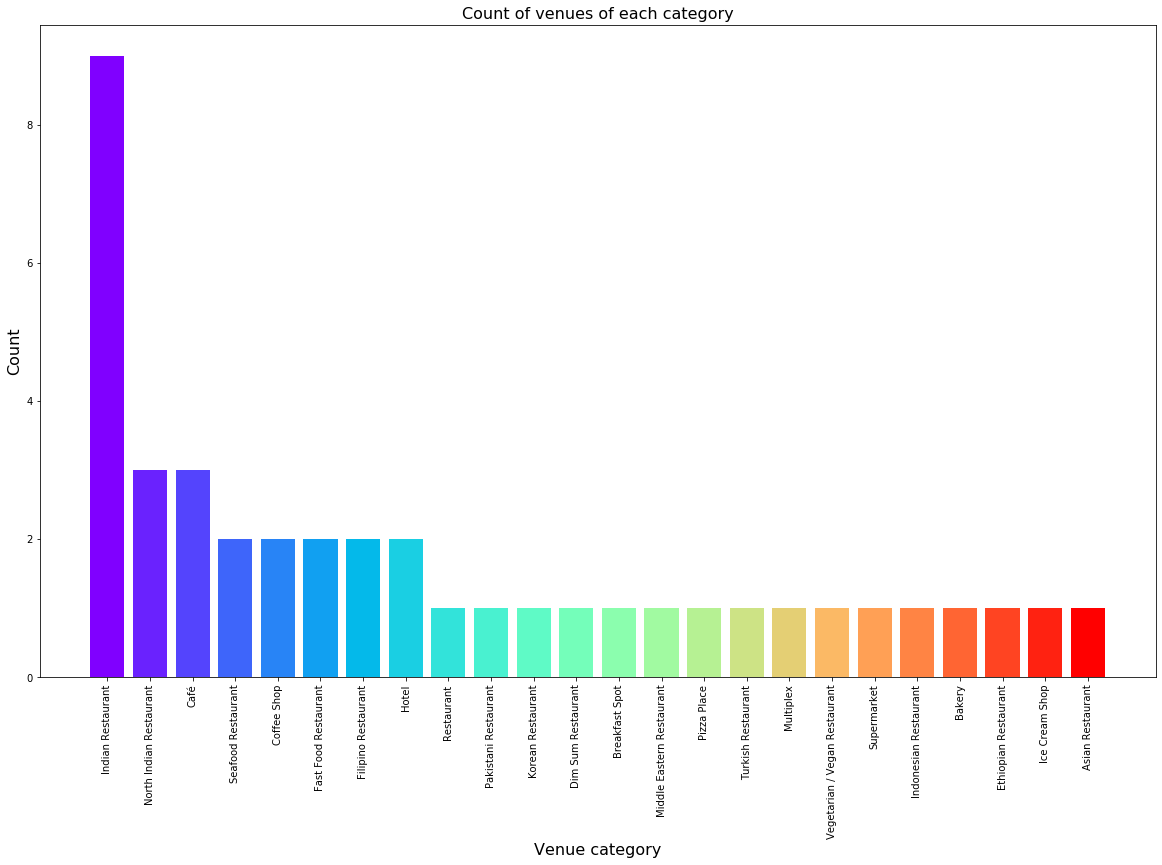

In [32]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

As we can see the majority venues are Indian Restaurant. So, Indian tourists can savour the Indian tastes at this location.

## Rating

Rating of a venue is an important factor on which a visitor decides whether it is worth it to visit the place. To cater to this, we will first see what is the average rating for all the venues in the city. Next, we will plot the venues on the map and color code them.

We'll first identify the various rating values and plot them as a bar plot with their counts to see the most common rating.

Text(0.5, 1.0, 'Count of venues with given rating')

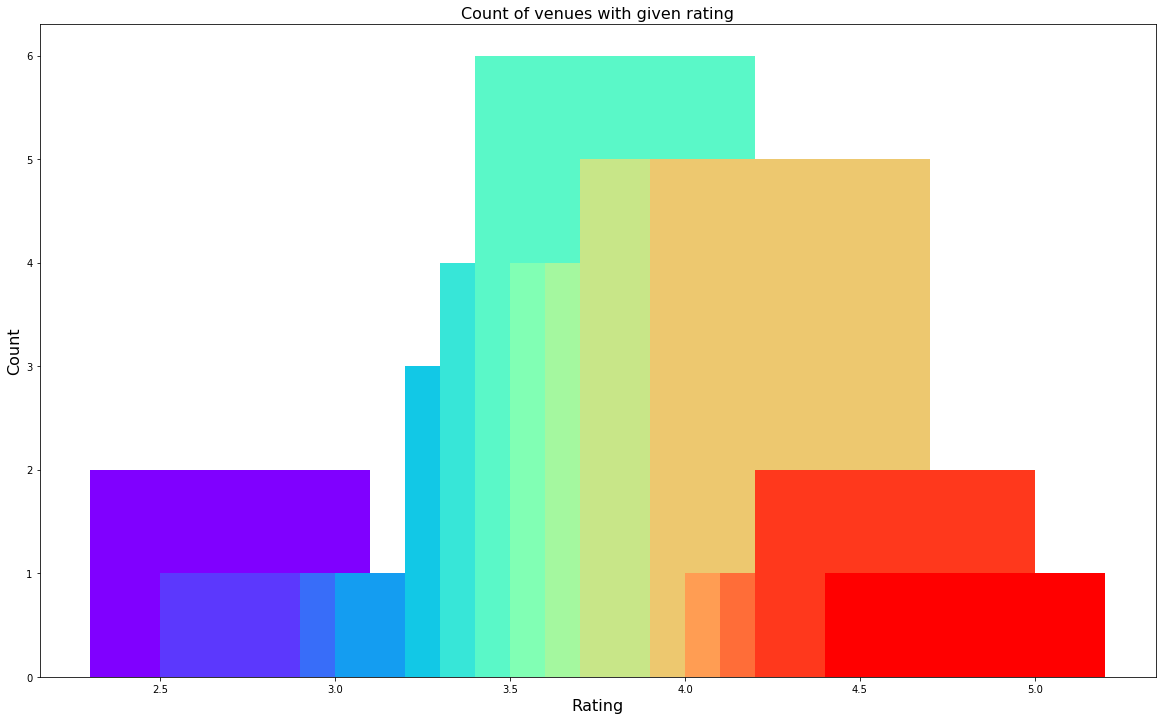

In [33]:
selected_venues['rating']= selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

From the plot above, it is clear that majority venues have their rating between 3.5 to 4.5

Let's create bins for various ratings and plot them in different colors on the map. The ratings will be divided between 4 bins:

* 1 to 2
* 2 to 3
* 3 to 4
* 4 to 5

In [34]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

Now, we will plot the venues on the map.

In [35]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

dubai_map = folium.Map(location = [dxb_latitude,dxb_longitude], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(dubai_map)  


dubai_map

The map has the location of all the venues. It appears that many venues are located near about **Kulfilicious with rating above 3.** If someone wants to explore new venues, they should definitely check out **Burjuman or Kulfilicious.**


## Price

We will now take a look the venues based on the price values. We have two price features for our venues, one is average_price which defines the average cost for one person and the other is price_range which determines the price range as defined by Zomato.

We will first explore the average_price using a scatter plot between the price and the count of venues with that average price. We'll size the points based on the price to highlight their price.

Text(0.5, 1.0, 'Count of venues with given average price')

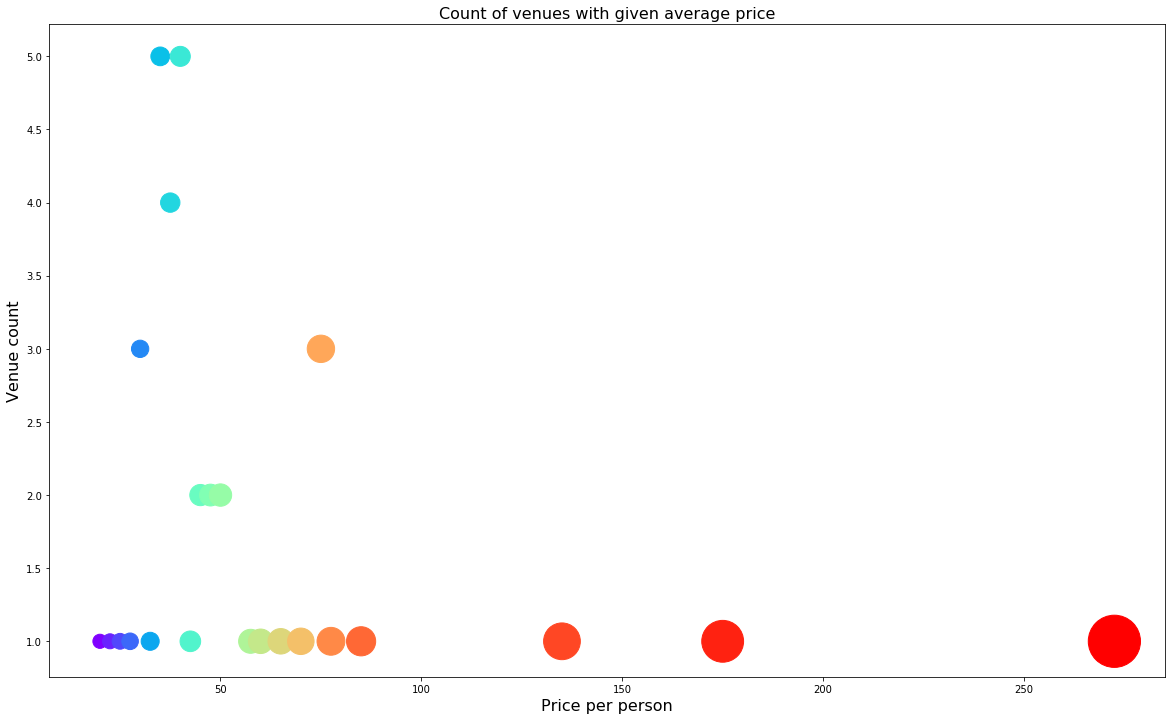

In [36]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

From the plot above we can see that a large number of venues have an average price within 50 Dirhams.

Users might also be interested in going to a place that fits in their budget. I'll use the price_range column to plot the venues on a map. We'll represent the venues with lower price in green and move towards red as the price increases.

In [203]:
color_map = {'1.0': 'green', '2.0': 'darkgreen', '3.0': 'orange', '4.0': 'red'}

dubai_map = folium.Map(location = [dxb_latitude,dxb_longitude], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(dubai_map)  


dubai_map

* The venues near Seoul Garden and SOL Sky Bar primarily high priced.
* The venues near Haji Ali Juice Center and Elco Veg Dine are both medium to high

## Clustering

We will now cluster all these venues based on their price range, location and more to identify similar venues and the relationship amongst them. We'll cluster the venues into two separate groups.

In [40]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(5)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,North Indian Restaurant,Rasoi Ghar,25.2502,55.3020,2.0,4.6,"Zainal Mohebi Plaza, Sheikh Khalifa Bin Zayed ...",45.0,Very good
1,1,Ice Cream Shop,Kulfilicious,25.2482,55.3071,1.0,4.1,"Shop 4, Ground Floor, Saeed Al Nabooda Buildin...",22.5,Very good
2,1,Middle Eastern Restaurant,Al Damyati & Iskandaron,25.2464,55.3066,2.0,4.3,"Ground Floor, Al Shraifi Building, Street 18 A...",35.0,Very good
3,1,Asian Restaurant,Chowking,25.2470,55.3079,2.0,3.4,"Shop 6, Ground Floor, Al Arti Plaza, Za'abeel ...",37.5,Good
4,1,Dim Sum Restaurant,Bikanervala,25.2486,55.3023,2.0,3.8,"Ground Floor, Mattar Al Saleem Building, Stree...",40.0,Good


In [41]:
dubai_map = folium.Map(location = [dxb_latitude,dxb_longitude], zoom_start = 13)
color_map = { 0: 'green', 1: 'red'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(dubai_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(dubai_map)


dubai_map

From the map, we see the two clusters:

* The first **cluster0** is includes very few venues and looks sparse.
* The second **cluster1** is dense and spread across the entire place of Karama
I'll also check the venues of the two clusters.

In [42]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Hotel,SOL Sky Bar - Zabeel House Al Seef,25.2561,55.3119,4.0,3.3,"Zabeel House Al Seef, Dubai Creek, Umm Hurair,...",175.0,Good
1,0,Hotel,The Gallery - BurJuman Arjaan by Rotana,25.2517,55.3012,3.0,2.7,"Level 3, BurJuman Arjaan by Rotana, Sheikh Kha...",135.0,Okay
2,0,Turkish Restaurant,Doors Freestyle Grill,25.2569,55.3122,4.0,4.8,"Al Seef Mall, Al Seef Street, Umm Hurair, Dubai",272.5,Very good


In [43]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 0 have mean price range of 3.67 and rating spread around 3.60


In [44]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,North Indian Restaurant,Rasoi Ghar,25.2502,55.3020,2.0,4.6,"Zainal Mohebi Plaza, Sheikh Khalifa Bin Zayed ...",45.0,Very good
1,1,Ice Cream Shop,Kulfilicious,25.2482,55.3071,1.0,4.1,"Shop 4, Ground Floor, Saeed Al Nabooda Buildin...",22.5,Very good
2,1,Middle Eastern Restaurant,Al Damyati & Iskandaron,25.2464,55.3066,2.0,4.3,"Ground Floor, Al Shraifi Building, Street 18 A...",35.0,Very good
3,1,Asian Restaurant,Chowking,25.2470,55.3079,2.0,3.4,"Shop 6, Ground Floor, Al Arti Plaza, Za'abeel ...",37.5,Good
4,1,Dim Sum Restaurant,Bikanervala,25.2486,55.3023,2.0,3.8,"Ground Floor, Mattar Al Saleem Building, Stree...",40.0,Good
5,1,North Indian Restaurant,Urban Fusion Cafe,25.2486,55.3113,2.0,3.6,"Wasl Topaz, Behind Ramee Royal Hotel, Street 7...",37.5,Good
6,1,Indonesian Restaurant,Betawi Cafe,25.2489,55.3026,3.0,4.1,"Shop 20 & 21, Ground Floor, Mabrooka Building,...",70.0,Very good
7,1,Indian Restaurant,Urban Tadka,25.2485,55.3033,3.0,3.9,"Shop 7 & 8, Ground Floor, Mabrooka Building, B...",50.0,Good
8,1,Vegetarian / Vegan Restaurant,Elco Veg Dine,25.2469,55.3079,2.0,3.8,"Shop 5, Ground Floor, Al Arti Plaza, Za'abeel ...",42.5,Good
9,1,Indian Restaurant,Delhi Darbar,25.2429,55.3067,2.0,3.8,"Shop 4, Ground Floor, Mattar Al Tayyer Buildin...",45.0,Good


In [249]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 2.30 and rating spread around 3.99


## Result and Discussion

Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor visiting the city of Chandigarh, India.

After collecting data from the **Foursquare and Zomato APIs,** we got a list of 49 different venues. However, not all venues from the two APIs were identical. Hence, we had to inspect their latitude and longitude values as well as names to combine them and remove all the outliers. This resulted in a total venue count of 41.

We identified that from the total set of venues, majority of them were **Indian Restaurants.** A visitor who loves Indian Restaurants would surely benefit from coming to Karama in Dubai.

While the complete range of ratings range from 1 to 5, the majority venues have ratings between 3 to 4.5. This means that most restaurants provide good quality food which is liked by the people of the city, thus indicating the high rating. When we plot these venues on the map, we discover that there are clusters of venues around **Kulfilicious and Elco Veg dine and Sol Sky Bar. These clusters also have very high ratings (more than 3).**

When we take a look at the price values of each venue, we explore that many venues have prices which are within the **range of 50 Dirhams for one person.** However, the variation in prices is very large, given the complete range starts from 35 dirham and goes uptil 400 dirhams. On plotting the venues based on their price range on the map, we discovered that venues located near **Elco Veg Dine relatively priced lower than venues Sol Sky Bar and Seol Garden. A mix of low price and high price exist in Haji ali Juice Centre and Kulfilicious.**

Finally, through clusters we identified that there are **many venues which are relatively lower priced but have an average rating of 3.57.** On the other hand, there are few venues which are **high priced and have average rating of 4.03.**

* If you're looking for cheap places with relatively high rating, you should check **Kulfilicious.**
* If you're looking for the best places, with the highest rating but might also carry a high price tag, you should Sol Sky Bar and **Seol Garden and Betawi Cafe.**
* If you're looking to explore the city and have no specific criteria to decide upon the places you want to visit, you should try near **Elco Veg Dine.**
A company can use this information to build up an online website/mobile application, to provide users with up to date information about various venues in the city based on the search criteria (name, rating and price).

## Conclusion

The purpose of this project was to explore the places that a person visiting Chandigarh could visit. The venues have been identified using Foursquare and Zomato API and have been plotted on the map. The map reveals that there are three major areas a person can visit in Karama area in Dubai: **Kulfilicious or Burjuman Mall, Elco Veg Dine and Sol Sky Bar . Based on the visitor's venue rating and price requirements, he/she can choose amongst the three places.**